### Problem A
An exothermic reaction A → B is to be carried out adiabatically to achieve a conversion of 90%. 
The rate-conversion data is provided in the figure below.
1) What size of single CSTR is needed?
2) What size of single PBR is needed?
Wishing to minimize the toal mass of catalyst 
needed:
3) What number, order and size of PBR and 
CSTR in series would you use to obtain a 
conversion of 90 %

In [1]:
# uncomment the following line to install latex
#!pip install latex

Let's first define some data points. In order to do this, we will create two lists, `list_x` and `list_y` and use  the `interp1d` function from the scipy library to create more data point in between (so that the curve looks more smooth). You can achieve thir result in many different ways, try out other ways if you can!

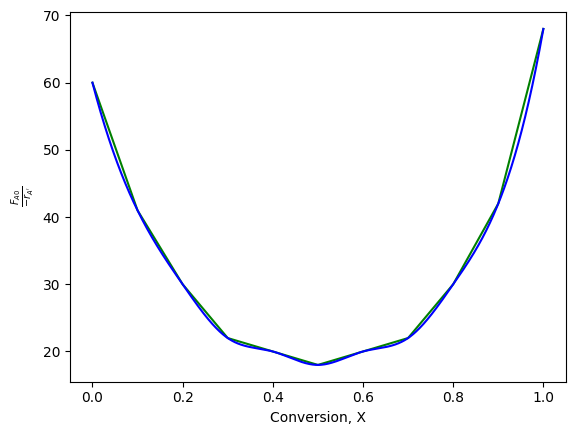

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
plt.rcParams['text.usetex'] = True
plt.rcParams.update(plt.rcParamsDefault)

# Define x and y lists
list_x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
list_y = [60, 41, 30, 22, 20, 18, 20, 22, 30, 42, 68]

# let's use the interp1d to create new data points and smooth the curve
f = interp1d(list_x, list_y, kind='cubic')
xnew = np.linspace(0, 1, num=10000, endpoint=True)

# let's plot our data
plt.plot(list_x, list_y, color='green')
plt.plot(xnew, f(xnew), color='blue')
plt.xlabel('Conversion, X')
plt.ylabel(r"$\frac{F_{A0}}{-r_{A'}}$")
plt.show()

**Part 1:  What size of single CSTR is needed?**

We can use the `index` or the `np.where` function (if you transformed the list into a numpy array) to reach 90% conversion as follows:

In [3]:
# 90% conversion where X=0.9
print(list_x.index(0.9))

# Once we have our X, we can find the y as:
print(f"F_A0/-r_A' is:  {list_y[list_x.index(0.9)]} kg")

9
F_A0/-r_A' is:  42 kg


For a catalytic reactor the size is normally given as weight of catalyst (W).

In [4]:
# now we can calculate W
W = list_y[9]*0.9
print(f'The size of the reactor is: {round(W, 1)} kg')

The size of the reactor is: 37.8 kg


**Part 2: What size of single PBR is needed?**

The size of a PBR needed to reach 90% conversion is equivalent to the area under the 
graph (blue area)

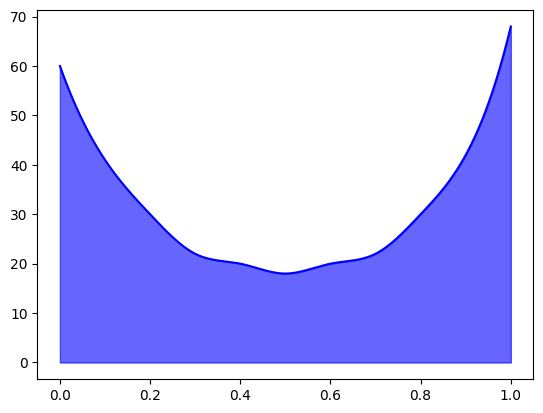

In [5]:
# plot the area under our curve
plt.plot(xnew, f(xnew), color='blue')
plt.fill_between(xnew, f(xnew), color='blue', alpha=0.6)
plt.show()

In order to calculate the correct area, the curve is broken down into 3 segments

In [6]:
# Define a sublist of the segments we are interested in
sublist_x = [0, 0.3, 0.6, 0.9]

# find the correspondent ys (given the index in list_x)
sublist_y_idx = [list_x.index(i) for i in sublist_x]
sublist_y = [list_y[i] for i in sublist_y_idx]

In [7]:
# Define a function to calculate the trapezoid area
def calculate_trapezoid_area(a, b, h):
    return round((a+b)/2*h, 2)

# find h, which is hiven by x2-x1
heights = [round(x2-x1, 1) for x1, x2 in zip(sublist_x, sublist_x[1:])]

# calculate the areas
areas = [calculate_trapezoid_area(sublist_y[idx], 
                                  sublist_y[idx+1], 
                                  h) for idx, h in enumerate(heights)]

# Find the size of the PBR needed
W_pbr = sum(areas)
print(f"The size of a single PBR needed is: {round(W_pbr, 1)} kg")

The size of a single PBR needed is: 27.9 kg


**Part 3: What number, order and size of PBR and 
CSTR in series would you use to obtain a 
conversion of 90 %**

In order to minimize the number of catalyst required, the process can be operated with 
multiple reactors. A CSTR reactor will be used where low conversion is required. A 
CSTR works well for high rate of reactions. A PBR is preferred when the rate of reaction 
is low.

Let's start by plotting the CSTR area

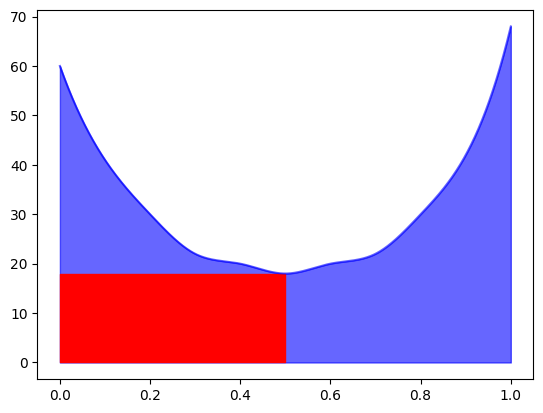

In [8]:
plt.plot(xnew, f(xnew), color='blue', alpha=0.6)
plt.fill_between(xnew, f(xnew), color='blue', alpha=0.6)
plt.fill_between([0, list_x[list_y.index(min(list_y))]], [min(list_y), 
                                    min(list_y)], color='red')
plt.show()

For the first reactor (CSTR) the conversion should be 0.5 corresponding to:

In [9]:
print(f"The conversion for the first reactor (CSTR) is: {list_x[list_y.index(min(list_y))]}")
print(f"F_A0/-r_A' is: {min(list_y)}")     

The conversion for the first reactor (CSTR) is: 0.5
F_A0/-r_A' is: 18


The size needed is given by $𝑊_{𝐶𝑆𝑇𝑅} = \frac{𝐹_{𝐴0}}{−𝑟𝐴}\cdot X$

Therefore, we can calculate the size needed for the CSTR as follows:

In [10]:
W_cstr = min(list_y)* list_x[list_y.index(min(list_y))]
print(f"The size of a single CSTR needed is: {round(W_cstr, 1)} kg")

The size of a single CSTR needed is: 9.0 kg


The size of the second reactor (PBR) can be found as:

In [11]:
# As before, we define our segments and find their correspondent y values
sublist_x_pbr = [0.5, 0.7, 0.9]
sublist_y_idx_pbr = [list_x.index(i) for i in sublist_x_pbr]
sublist_y_pbr = [list_y[i] for i in sublist_y_idx_pbr]

# find the heights given by x2-x1
heights_pbr = [round(y-x, 1) for x, y in zip(sublist_x_pbr, sublist_x_pbr[1:])]

# find the trapezoid areas for the given values
areas_pbr = [calculate_trapezoid_area(sublist_y_pbr[idx], 
                                  sublist_y_pbr[idx+1], 
                                  h) for idx, h in enumerate(heights_pbr)]

# calculate the size of the PBR needed
W_pbr_second = sum(areas_pbr)
print(f"The size of a single PBR needed is: {round(W_pbr_second, 1)} kg")

The size of a single PBR needed is: 10.4 kg


Now we can calculate the total size of the two reactors as:

In [12]:
# calculate the total size of the reactors
print(f"The total size of the two reactors is: {W_cstr + W_pbr_second} kg")

The total size of the two reactors is: 19.4 kg
